In [5]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d subhajournal/phishingemails

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/subhajournal/phishingemails
License(s): GNU Lesser General Public License 3.0
 67% 12.0M/18.0M [00:00<00:00, 57.9MB/s]
100% 18.0M/18.0M [00:00<00:00, 78.5MB/s]


In [7]:
!unzip /content/phishingemails.zip

Archive:  /content/phishingemails.zip
  inflating: Phishing_Email.csv      


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,GRU,LSTM,Bidirectional,SimpleRNN
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("Phishing_Email.csv")

df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
Email Text,16
Email Type,0


In [11]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)

In [12]:
print("Dimension of the row data:",df.shape)

Dimension of the row data: (17538, 2)


In [13]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [14]:

fig = px.bar(df['Email Type'].value_counts(), x=df['Email Type'].value_counts().index, y=df['Email Type'].value_counts().values,
             color=['blue', 'red'], labels={'x': 'Category', 'y': 'Count'},
             title="Categorical Distribution")

fig.show()

In [15]:
le = LabelEncoder()

df["Email Type"] = le.fit_transform(df["Email Type"])

In [16]:
df

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0
...,...,...
18644,\nRick Moen a Ã©crit:> > I'm confused. I thou...,1
18645,date a lonely housewife always wanted to date ...,0
18646,request submitted : access request for anita ....,1
18647,"re : important - prc mtg hi dorn & john , as y...",1


In [17]:
import re

def preprocess_text(text):

    text = re.sub(r'http\S+', '', text)


    text = re.sub(r'[^\w\s]', '', text)

    text = text.lower()

    text = re.sub(r'\s+', ' ', text).strip()
    return text


df["Email Text"] =df["Email Text"].apply(preprocess_text)

In [18]:
df.head()

,Email Text,Email Type
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,the other side of galicismos galicismo is a sp...,1
2,re equistar deal tickets are you still availab...,1
3,hello i am your hot lil horny toy i am the one...,0
4,software at incredibly low prices 86 lower dra...,0


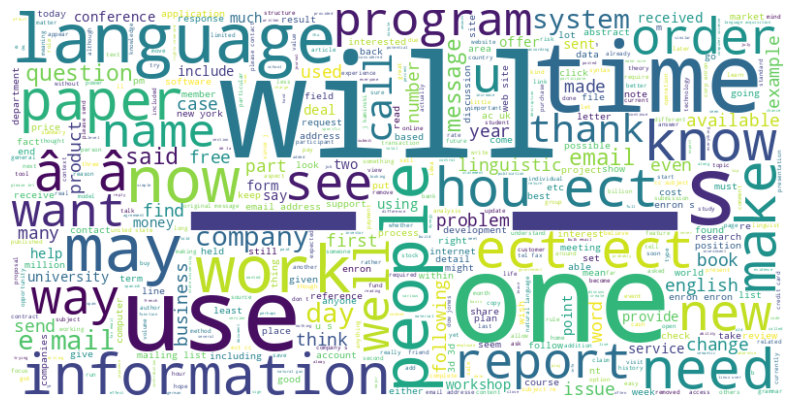

In [20]:
from wordcloud import WordCloud

all_mails = " ".join(df['Email Text'])

word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=10000).generate(all_mails)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
tf = TfidfVectorizer(stop_words="english",max_features=10000)

feature_x = tf.fit_transform(df["Email Text"]).toarray()

In [22]:
y_tf = np.array(df['Email Type'])

In [23]:
x_train,x_test,y_train,y_test = train_test_split(feature_x,y_tf,train_size=0.8,random_state=0)

Accuracy from SGD Classifier: 98.29 %
F1 Score from SGD Classifier: 98.61 %
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1351
           1       0.98      0.99      0.99      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



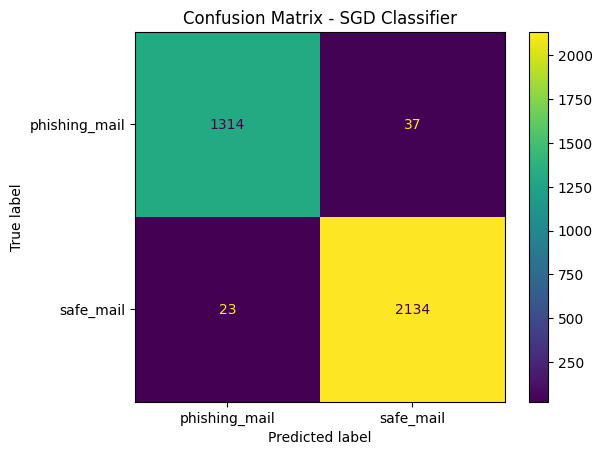

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

pred_sgd = sgd.predict(x_test)


print(f"Accuracy from SGD Classifier: {accuracy_score(y_test, pred_sgd) * 100:.2f} %")
print(f"F1 Score from SGD Classifier: {f1_score(y_test, pred_sgd) * 100:.2f} %")
print("Classification Report:\n", classification_report(y_test, pred_sgd))

clf_sgd = confusion_matrix(y_test, pred_sgd)
ConfusionMatrixDisplay(confusion_matrix=clf_sgd, display_labels=['phishing_mail', 'safe_mail']).plot()
plt.title("Confusion Matrix - SGD Classifier")
plt.show()


Accuracy from MLP Classifier: 98.43 %
F1 Score from MLP Classifier: 98.73 %
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1351
           1       0.99      0.99      0.99      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



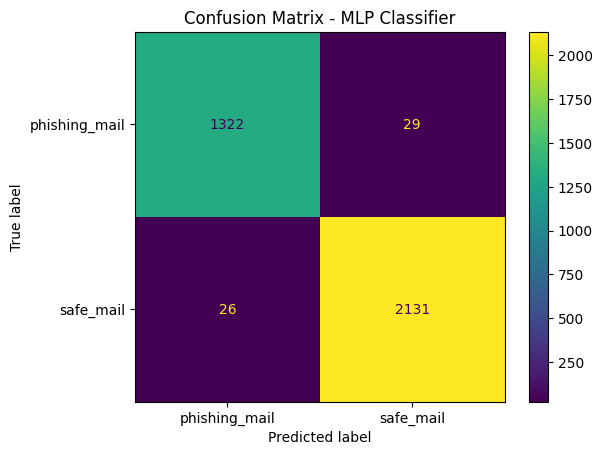

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


mlp = MLPClassifier()
mlp.fit(x_train, y_train)

pred_mlp = mlp.predict(x_test)


print(f"Accuracy from MLP Classifier: {accuracy_score(y_test, pred_mlp) * 100:.2f} %")
print(f"F1 Score from MLP Classifier: {f1_score(y_test, pred_mlp) * 100:.2f} %")
print("Classification Report:\n", classification_report(y_test, pred_mlp))

clf_mlp = confusion_matrix(y_test, pred_mlp)
ConfusionMatrixDisplay(confusion_matrix=clf_mlp, display_labels=['phishing_mail', 'safe_mail']).plot()
plt.title("Confusion Matrix - MLP Classifier")
plt.show()


In [29]:
import plotly.express as px

models = ['SGD Classifier', 'MLP Classifier']
accuracies = [98.57, 98.29]

fig = px.bar(x=models, y=accuracies, labels={'x': 'Models', 'y': 'Accuracy'},
             title="Performance Comparison: SGD vs MLP", text=accuracies)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside', marker_color=['blue', 'orange'])

fig.show()


In [30]:
max_len = 150

tk = Tokenizer()


tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences,padding='post', maxlen=max_len)

In [31]:
len(vector)

17538

In [32]:
x = np.array(vector)
y = np.array(df["Email Type"])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(vector,df['Email Type'], test_size=0.2, random_state =0)

In [34]:
model = Sequential()
model.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model.add(LSTM(units=100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
historical  = model.fit(x_train,y_train, epochs=5, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.6890 - loss: 0.5644 - val_accuracy: 0.6864 - val_loss: 0.5480
Epoch 2/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.7919 - loss: 0.4186 - val_accuracy: 0.7349 - val_loss: 0.5402
Epoch 3/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.9201 - loss: 0.2188 - val_accuracy: 0.9364 - val_loss: 0.1994
Epoch 4/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9571 - loss: 0.1461 - val_accuracy: 0.9541 - val_loss: 0.1389
Epoch 5/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9749 - loss: 0.0959 - val_accuracy: 0.9738 - val_loss: 0.1007


Text(0, 0.5, 'Loss')

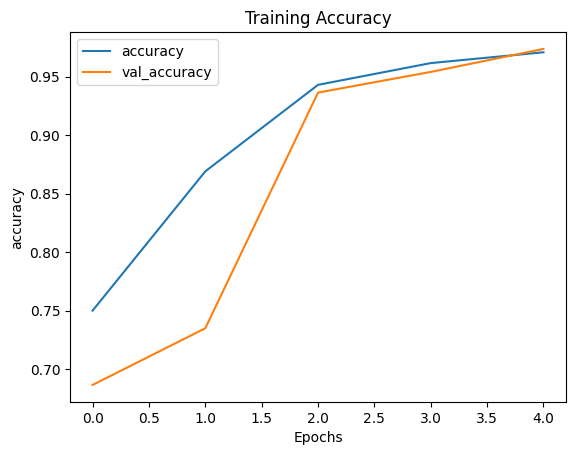

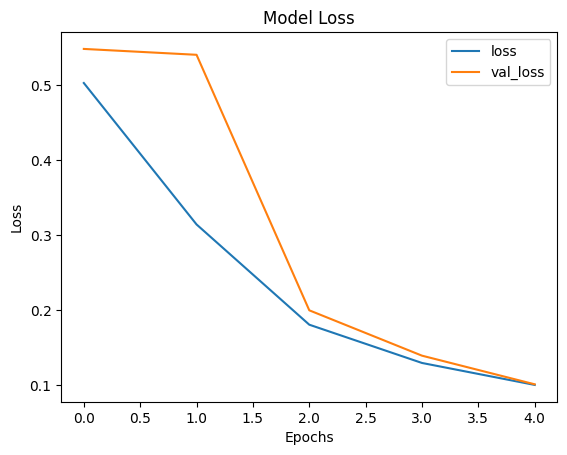

In [38]:
import matplotlib.pyplot as plt
pd.DataFrame(historical.history)

pd.DataFrame(historical.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')